In [1]:
from project_functions import *
sns.set(rc={'figure.figsize':(15,8)})

In [9]:
mdotm_train_feat = pd.read_csv('input_train.csv', index_col=0)
mdotm_train_tgt = pd.read_csv('label_train.csv', index_col=0).rename({'0':'target'}, axis=1)
mdotm_test_feat = pd.read_csv('input_test.csv', index_col=0)

# rename features
mdotm_train_feat.columns = [f'f{i}' for i in mdotm_train_feat.columns]
mdotm_test_feat.columns = mdotm_train_feat.columns

# df dataset contains labeled data
df = mdotm_train_feat.join(mdotm_train_tgt)

# set target labels as 0, 1
df['target'] = df['target'].mask(df['target']==-1, 0)

# Check if target is balanced (yes it is) and if there are missing values (no)
print('values count', df.target.value_counts())
print('missing values', df.isna().sum().sum())

# shuffle train set with explicit seed for reproducibility
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

values count target
1    27000
0    27000
Name: count, dtype: int64
missing values 0


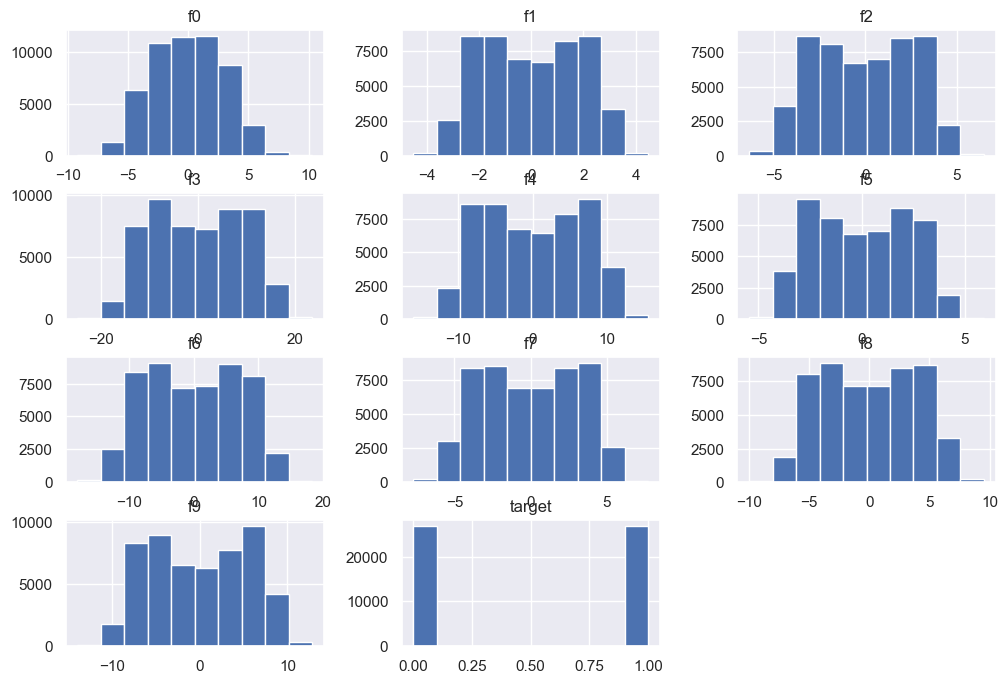

In [10]:
df.hist(figsize=(12,8))
plt.show()

<Axes: >

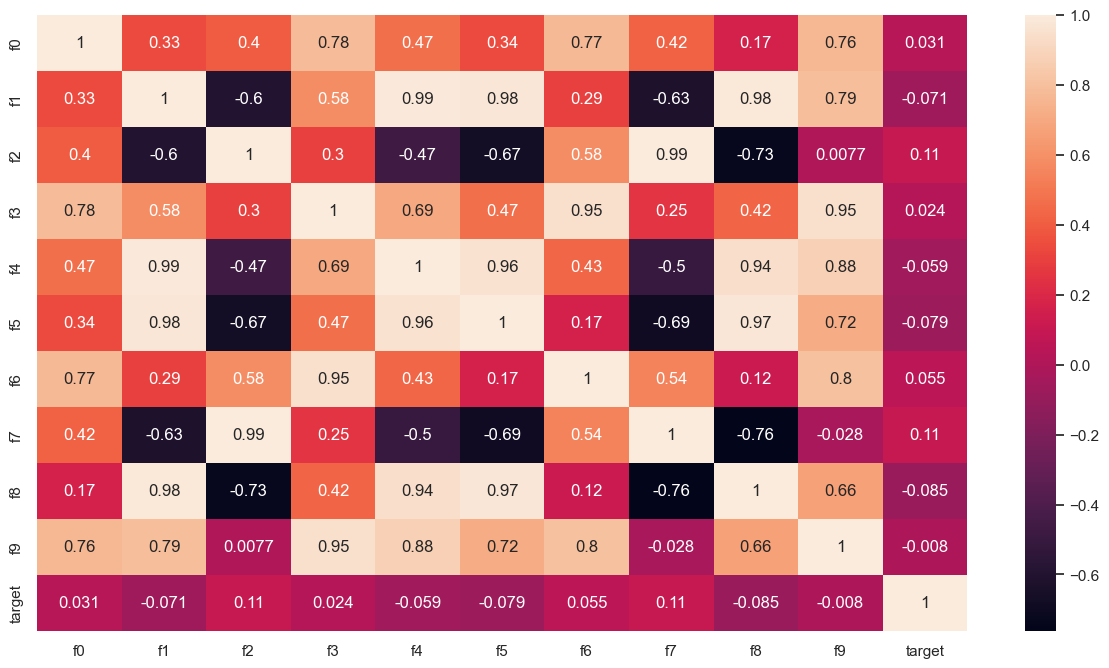

In [11]:
sns.heatmap(df.corr(method='spearman'), annot=True)

## Manifold Learning

In [12]:
features = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

# perform train, validation, test splitting and scale data
train = df.iloc[:int(len(df)*0.6)].copy()
valid = df.iloc[int(len(df)*0.6):int(len(df)*0.8)].copy()
test = df.iloc[int(len(df)*0.8):].copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train[features])
X_valid_scaled = scaler.transform(valid[features])
X_test_scaled = scaler.transform(test[features])

y_train = train['target']
y_valid = valid['target']
y_test = test['target']

# Fit Kernel PCA for dimensionality reduction
rbf_pca = KernelPCA(n_components = 3, kernel = 'rbf', gamma = 0.025, random_state=1)
X_train_kpca = rbf_pca.fit_transform(X_train_scaled)
X_valid_kpca = rbf_pca.transform(X_valid_scaled)
X_test_kpca = rbf_pca.transform(X_test_scaled)

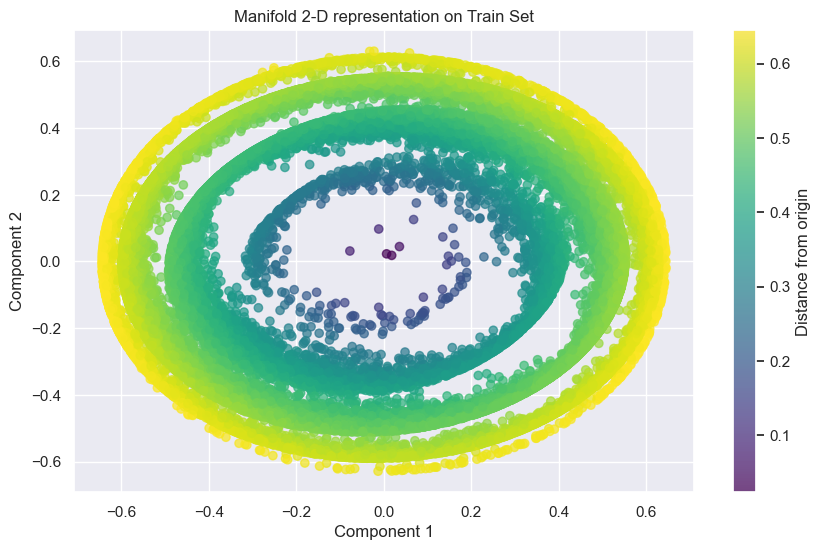

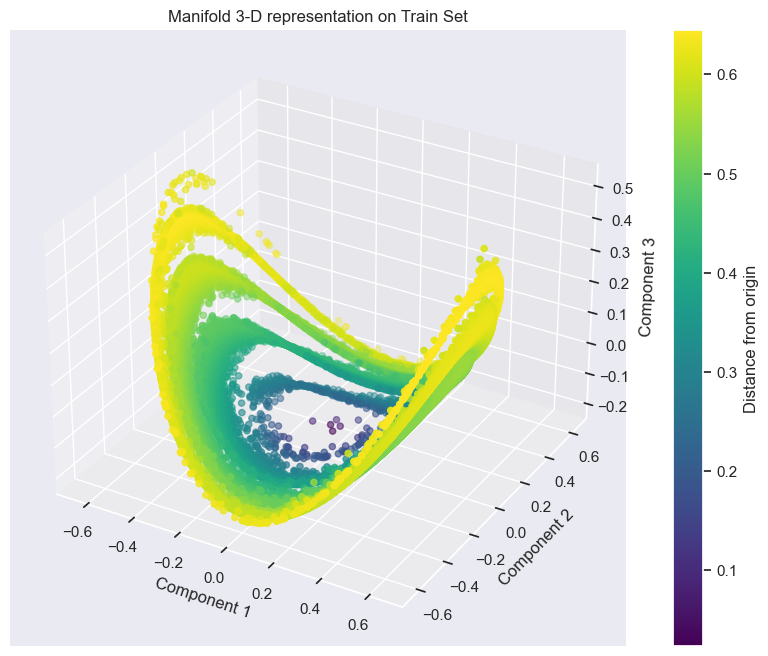

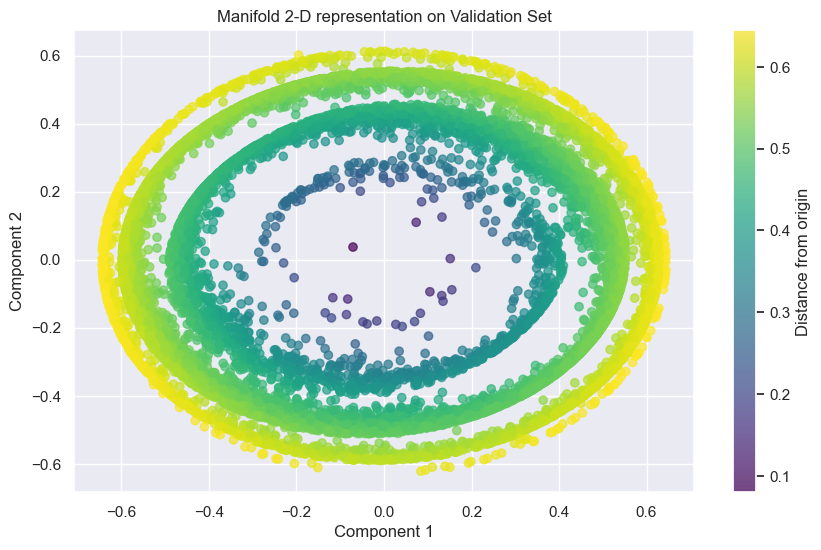

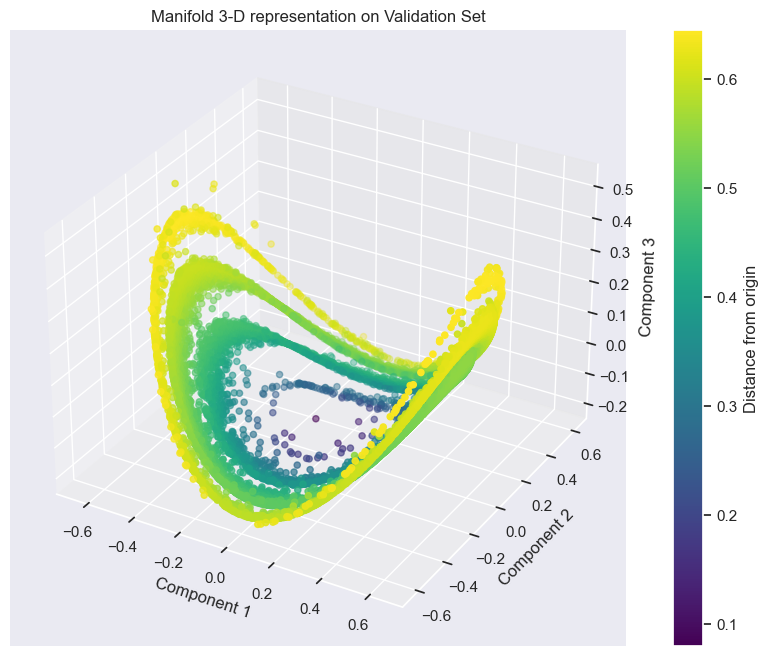

In [15]:
plot_2d(X_train_kpca[:,0], X_train_kpca[:,1], 'Manifold 2-D representation on Train Set')
plot_3d(X_train_kpca[:,0], X_train_kpca[:,1], X_train_kpca[:,2], 'Manifold 3-D representation on Train Set')

plot_2d(X_valid_kpca[:,0], X_valid_kpca[:,1], 'Manifold 2-D representation on Validation Set')
plot_3d(X_valid_kpca[:,0], X_valid_kpca[:,1], X_valid_kpca[:,2], 'Manifold 3-D representation on Validation Set')

## Classification model

In [20]:
X_train_kpca

array([[ 0.54909202, -0.25489985,  0.18368996],
       [-0.30450367, -0.31760996, -0.08134207],
       [-0.00175652, -0.54766209, -0.18849345],
       ...,
       [-0.23222975, -0.32040563, -0.12887416],
       [-0.5672817 ,  0.04181899,  0.16602054],
       [ 0.56243622,  0.22549894,  0.18542374]])